<a href="https://colab.research.google.com/github/heisenberg183/SoftComputing/blob/main/SCExp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
df = pd.read_csv("/content/data.csv")
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [31]:
df.drop(["id","Unnamed: 32"], axis=1 , inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [33]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64')]

In [34]:
df.select_dtypes(include = ['object']).columns

Index(['diagnosis'], dtype='object')

In [35]:
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [37]:
y = df.diagnosis.values.reshape(-1,1)
X = df.iloc[:,1:].values

In [38]:
X = ((X - np.min(X))/(np.max(X)-np.min(X)))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (455, 30)
X_test: (114, 30)
y_train: (455, 1)
y_test: (114, 1)


In [41]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

In [42]:
# Adding the input layer and the first hidden layer
ann.add((tf.keras.layers.Dense(units=6,
                               activation="relu")))

In [43]:
# Adding the second hidden layer
ann.add((tf.keras.layers.Dense(units=6,
                               activation="relu")))

In [44]:
# Adding the output layer
ann.add((tf.keras.layers.Dense(units=1,
                               activation="sigmoid")))

"""
When performing classification, it is important to select an appropriate activation function.
For binary classification tasks, a sigmoid activation function is recommended.
However, for multi-class classification problems, a soft max activation function is more suitable.
On the other hand, if the task involves regression, where the goal is to predict a continuous real number,
then it is best to avoid using any activation function at all.
"""

'\nWhen performing classification, it is important to select an appropriate activation function. \nFor binary classification tasks, a sigmoid activation function is recommended. \nHowever, for multi-class classification problems, a soft max activation function is more suitable. \nOn the other hand, if the task involves regression, where the goal is to predict a continuous real number, \nthen it is best to avoid using any activation function at all.\n'

In [45]:
ann.compile(optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [46]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.6286
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.6286
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.6286
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.6286
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6286
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.6286
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6286
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6286
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6286
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6286
Epoch 11/

In [47]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

4/4 [==============================] - 0s 4ms/step
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


In [48]:
# Define a function to plot the confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2 , v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.subplots(figsize = (5,3))
    ax = sns.heatmap(cm/np.sum(cm), annot=labels, fmt="", cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')
    ax.set_title(f'Random Forest Classification')
    plt.show()

Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


____________



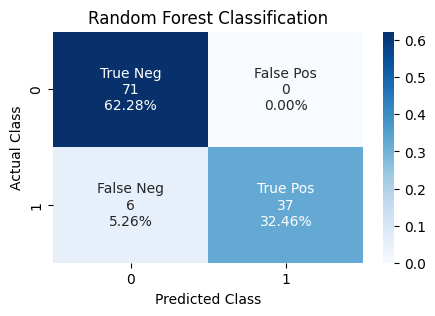

In [49]:
print(f"Classification report:\n{classification_report(y_test, y_pred)}")
print("")
print("_"*12)
print("")

# Plot the confusion matrix as a heatmap
plot_confusion_matrix(y_test, y_pred)